In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

import keras
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils.np_utils import to_categorical

keras.__version__

Using TensorFlow backend.
C:\Users\Jinsung\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Jinsung\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Jinsung\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Jinsung\Anaconda3\lib\site-packages\tensorflow\python\framework\d

'2.2.4'

In [2]:
# IMDB 데이터셋에서처럼 num_words=10000 매개변수는 데이터에서 가장 자주 등장하는 단어 10000개만 사용
from keras.datasets import reuters

np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

np.load = np_load_old

In [3]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(8982,)
(8982,)
(2246,)
(2246,)


In [4]:
# IMDB 리뷰처럼 각샘플은 정수 리스트(단어 인덱스)
print(train_data[10])

# 샘플에 연결된 레이블은 토픽의 인덱스로 0과 45 사이의 정수
print(train_labels[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
3


In [5]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1. # results[i]에서 트정 인덱스의 위치를 1로 만든다
    return results

# 훈련 데이터를 벡터로 변환
x_train = vectorize_sequences(train_data)

# 테스트 데이터를 벡터로 변환
x_test = vectorize_sequences(test_data)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [6]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [7]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [9]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 9s 1ms/step - loss: 2.5304 - acc: 0.4965 - val_loss: 1.7207 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 6s 764us/step - loss: 1.4461 - acc: 0.6880 - val_loss: 1.3468 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 7s 911us/step - loss: 1.0964 - acc: 0.7645 - val_loss: 1.1727 - val_acc: 0.7440
Epoch 4/20
7982/7982 [==============================] - 9s 1ms/step - loss: 0.8706 - acc: 0.8157 - val_loss: 1.0798 - val_acc: 0.7600
Epoch 5/20
7982/7982 [==============================] - 9s 1ms/step - loss: 0.7042 - acc: 0.8479 - val_loss: 0.9851 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 7s 856us/step - loss: 0.5680 - acc: 0.8791 - val_loss: 0.9421 - val_acc: 0.8050
Epoch 7/20
7982/7982 [=========================

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

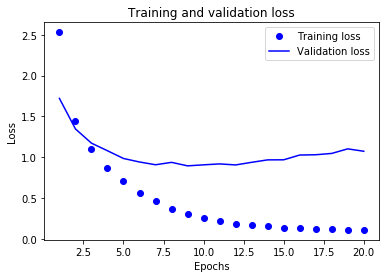

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# 'bo'는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

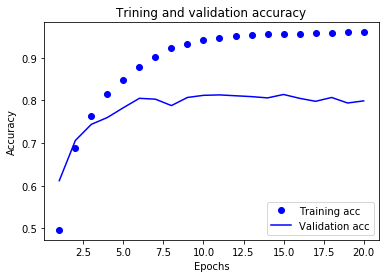

In [12]:
plt.clf() # 그래프를 초기화
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Trining and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [13]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
print(results) # [, acc]

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 21s 3ms/step - loss: 0.0735 - acc: 0.9804 - val_loss: 0.0504 - val_acc: 0.9855
Epoch 2/9
7982/7982 [==============================] - 8s 1ms/step - loss: 0.0419 - acc: 0.9887 - val_loss: 0.0392 - val_acc: 0.9899
Epoch 3/9
7982/7982 [==============================] - 14s 2ms/step - loss: 0.0321 - acc: 0.9914 - val_loss: 0.0355 - val_acc: 0.9903
Epoch 4/9
7982/7982 [==============================] - 10s 1ms/step - loss: 0.0262 - acc: 0.9928 - val_loss: 0.0341 - val_acc: 0.9907
Epoch 5/9
7982/7982 [==============================] - 10s 1ms/step - loss: 0.0218 - acc: 0.9938 - val_loss: 0.0322 - val_acc: 0.9913
Epoch 6/9
7982/7982 [==============================] - 11s 1ms/step - loss: 0.0181 - acc: 0.9947 - val_loss: 0.0304 - val_acc: 0.9919
Epoch 7/9
7982/7982 [==============================] - 9s 1ms/step - loss: 0.0152 - acc: 0.9954 - val_loss: 0.0300 - val_acc: 0.9919
Epoch 8/9
7982/7

In [14]:
# 데이터 테스트
predictions = model.predict(x_test)
print(predictions[0].shape)
print(np.argmax(predictions[0]))

(46,)
3


In [15]:
# 은닉 층의 노드 수를 출력 노드수에 비해 줄이면 안되는 이유 테스트
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# epochs를 4로 낮춤
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
print(results) # [, acc]

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 21s 3ms/step - loss: 0.0986 - acc: 0.9783 - val_loss: 0.0930 - val_acc: 0.9783
Epoch 2/9
7982/7982 [==============================] - 6s 742us/step - loss: 0.0886 - acc: 0.9784 - val_loss: 0.0842 - val_acc: 0.9788
Epoch 3/9
7982/7982 [==============================] - 8s 993us/step - loss: 0.0789 - acc: 0.9797 - val_loss: 0.0758 - val_acc: 0.9807
Epoch 4/9
7982/7982 [==============================] - 7s 866us/step - loss: 0.0701 - acc: 0.9814 - val_loss: 0.0681 - val_acc: 0.9819
Epoch 5/9
7982/7982 [==============================] - 6s 749us/step - loss: 0.0612 - acc: 0.9822 - val_loss: 0.0593 - val_acc: 0.9825
Epoch 6/9
7982/7982 [==============================] - 8s 1ms/step - loss: 0.0520 - acc: 0.9850 - val_loss: 0.0521 - val_acc: 0.9862
Epoch 7/9
7982/7982 [==============================] - 8s 1ms/step - loss: 0.0453 - acc: 0.9882 - val_loss: 0.0480 - val_acc: 0.9883
Epoch 8/9
79